In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('project2.data')

/tmp/ipykernel_25432/783506433.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print("Shape of the dataset: " + str(data.shape))
print("Size of the dataset: " + str(data.size))

Shape of the dataset: (286, 10)
Size of the dataset: 2860


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [4]:
for i in range(0,9):
    print(data.columns[i] + " unique values:")
    print(data.iloc[:,i].unique())

class unique values:
['no-recurrence-events' 'recurrence-events']
age unique values:
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause unique values:
['premeno' 'ge40' 'lt40']
tumor-size unique values:
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes unique values:
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps unique values:
['no' 'yes' '?']
deg-malig unique values:
[3 2 1]
breast unique values:
['left' 'right']
breast-quad unique values:
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']


In [5]:
# we can see that there are questionable values in node-caps and breast-quad, let's see in which rows:
data.loc[data['node-caps'] == ("?")]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [6]:
for i in data.loc[data['node-caps'] == ("?")].index:
    fill = data.iloc[i]
    print(data.drop(i).loc[data['class'] == fill['class']]["node-caps"].describe().top)
# by separating and analyzing subsets of the dataset that have matching column values (similar to a nearest-neighbors algorithm)
# with each of our rows with unknowns, we can see that the majority node-caps (mode) value for each subset is "no", so we can then
# easily replace all unknown values with this.
# NOTE: by chaining multiple .loc[] operations, we can filter by multiple matching columns at the same time, but "no" is the most
# common value for most (if not all) of the stricter filters.

no
no
no
no
no
no
no
no


In [7]:
data.loc[data['node-caps'] == ("?"),["node-caps"]] = "no"

In [8]:
# repeat for breast-quad
data.loc[data['breast-quad'] == ("?")]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [9]:
fill = data.iloc[206]
data.drop(206).loc[data['class'] == fill['class']].loc[data['age'] == fill['age']].loc[data['menopause'] == fill['menopause']].loc[data['tumor-size'] == fill['tumor-size']]["breast-quad"].describe().top
# stricter filtering mentioned above is used here to find the mode value

'right_low'

In [10]:
data.loc[data['breast-quad'] == ("?"), ["breast-quad"]] = "right_low"

In [11]:
for i in range(0,9):
    print(data.columns[i] + " unique values:")
    print(data.iloc[:,i].unique())
    # all data now seems to be well-classified

class unique values:
['no-recurrence-events' 'recurrence-events']
age unique values:
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause unique values:
['premeno' 'ge40' 'lt40']
tumor-size unique values:
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv-nodes unique values:
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node-caps unique values:
['no' 'yes']
deg-malig unique values:
[3 2 1]
breast unique values:
['left' 'right']
breast-quad unique values:
['left_low' 'right_up' 'left_up' 'right_low' 'central']


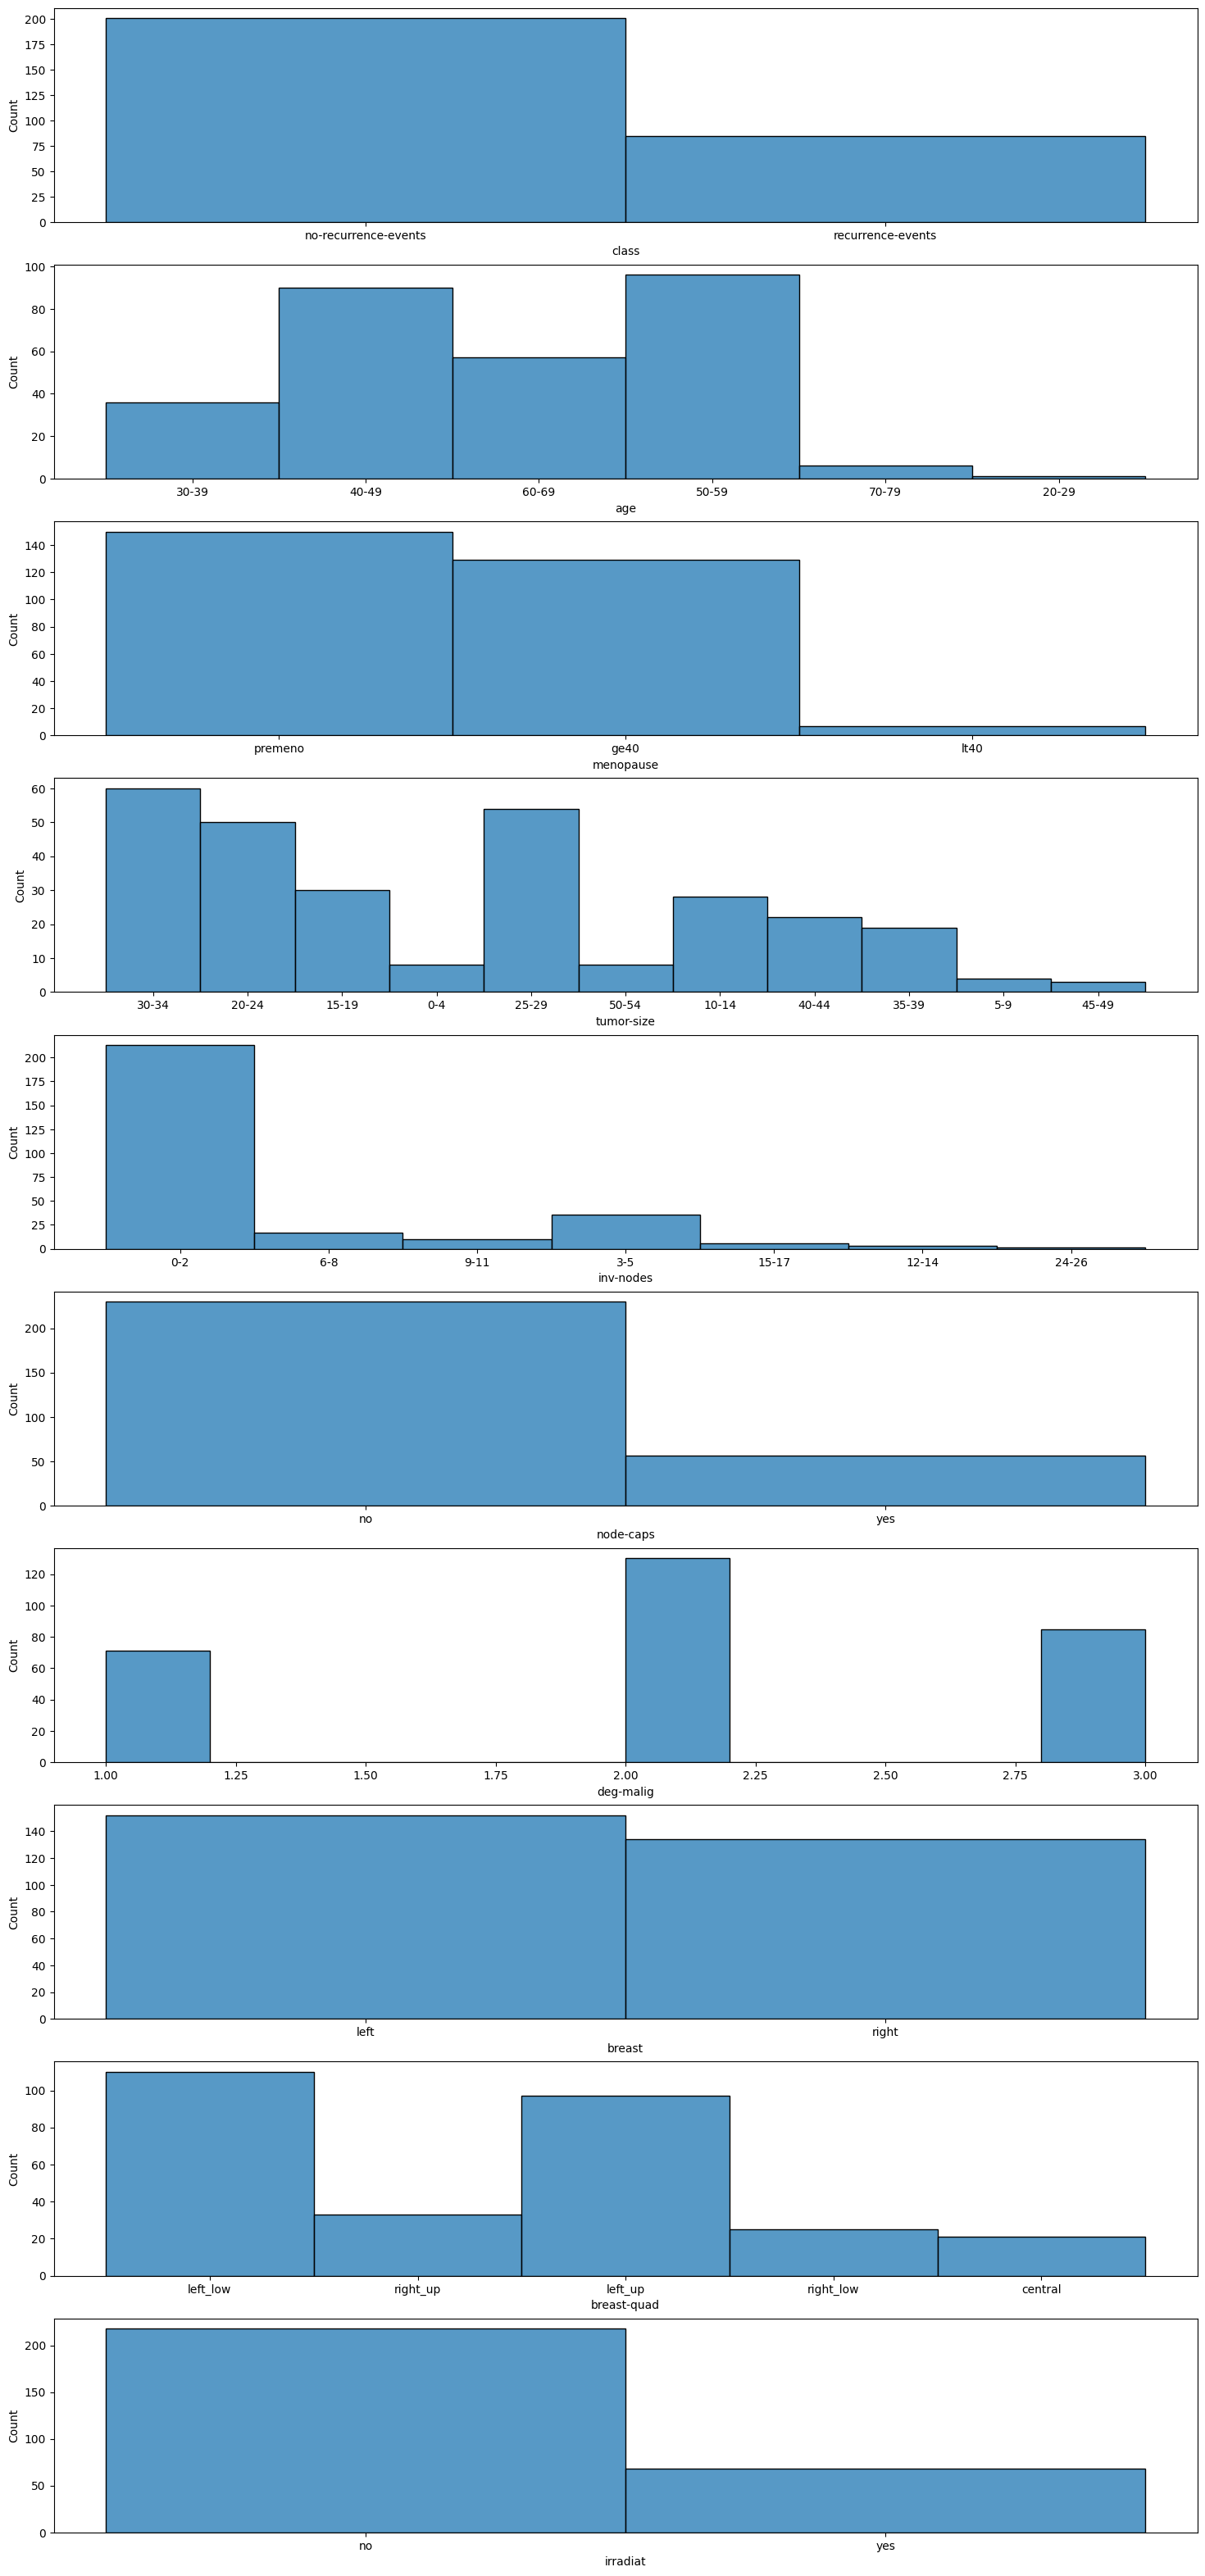

In [12]:
fig, axes = plt.subplots(10, 1, figsize=(18, 40))
for i in range(0,10):
    sns.histplot(ax=axes[i], data=data.iloc[:,i])
# based on these plots, all of the features are discrete (and most are strings), so almost all of them should be one-hot encoded.
# We can allow the "deg-malig" feature to remain discrete to both limit our dimension expansion and so we don't potentially lose a numerical "distance"

In [13]:
for i in data.columns:
    if i != "deg-malig" and i != "class":
        data[i] = data[i].astype("category")
        data = pd.get_dummies(data, columns=[i], drop_first=True)

data.info()
# we unfortunately now have a high dimensional space

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   class                  286 non-null    object
 1   deg-malig              286 non-null    int64 
 2   age_30-39              286 non-null    bool  
 3   age_40-49              286 non-null    bool  
 4   age_50-59              286 non-null    bool  
 5   age_60-69              286 non-null    bool  
 6   age_70-79              286 non-null    bool  
 7   menopause_lt40         286 non-null    bool  
 8   menopause_premeno      286 non-null    bool  
 9   tumor-size_10-14       286 non-null    bool  
 10  tumor-size_15-19       286 non-null    bool  
 11  tumor-size_20-24       286 non-null    bool  
 12  tumor-size_25-29       286 non-null    bool  
 13  tumor-size_30-34       286 non-null    bool  
 14  tumor-size_35-39       286 non-null    bool  
 15  tumor-size_40-44       

In [14]:
# restructuring target variable to be compatible with later optimizations
# no-recurrence-events set to 1, recurrence-events set to 0
data.loc[data["class"] == "no-recurrence-events",["class"]] = 1
data.loc[data["class"] == "recurrence-events",["class"]] = 0
data["class"] = data["class"].astype("int")

In [15]:
# split dataset, maintaining proportions of the target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.3, stratify=data.iloc[:,0], random_state=3)

In [16]:
print(data["class"].astype("object").describe())
print("proportion of no-recurrence-events: " + str(201/286))

count     286
unique      2
top         1
freq      201
Name: class, dtype: int64
proportion of no-recurrence-events: 0.7027972027972028


In [17]:
print(y_train.astype("object").describe())
print("proportion of no-recurrence-events: " + str(141/200))

count     200
unique      2
top         1
freq      141
Name: class, dtype: int64
proportion of no-recurrence-events: 0.705


In [18]:
print(y_test.astype("object").describe())
print("proportion of no-recurrence-events: " + str(60/86))
# target variable proportions are roughly the same across training, test, and original dataset

count     86
unique     2
top        1
freq      60
Name: class, dtype: int64
proportion of no-recurrence-events: 0.6976744186046512


In [19]:
# For this dataset, optimizing precision (minimizing number of false positives) for no-recurrence-events (class value 1) is primarily important,
# because incorrectly diagnosing someone as having no risk of recurring breast cancer is more detrimental than the alternative
# NOTE: Optimizing this should also optimize recall (minimizing number of false negatives) for recurrence-events to an extent, which is good for
# the same reason

In [20]:
# KNeighborsClassifier, optimizing for the best amount of neighbors to maximize precision for no-recurrence-events 
from sklearn.neighbors import KNeighborsClassifier
knn_search_recall = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(3, 50)} # preventing overfitting with n_neighbors = 1 or 2

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
#recall_recurr = recall_score(pos_label="recurrence-events")
knn_gscv = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="precision")
knn_gscv.fit(X_train, y_train)

print(knn_gscv.best_params_)
best_knn = knn_gscv.best_estimator_
from sklearn.metrics import classification_report
print(f"KNN Performance on TEST\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")
print(f"KNN Performance on TRAIN\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")
# Again, we care primarily about precision for 1 (no-recurrence-events)

{'n_neighbors': 4}
KNN Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.45      0.38      0.42        26
           1       0.75      0.80      0.77        60

    accuracy                           0.67        86
   macro avg       0.60      0.59      0.60        86
weighted avg       0.66      0.67      0.67        86

KNN Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.67      0.64      0.66        59
           1       0.85      0.87      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.75      0.76       200
weighted avg       0.80      0.80      0.80       200



In [21]:
# LogisticRegression, no hyperparameters to optimize
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
param_grid = {"n_neighbors": np.arange(3, 50)} # preventing overfitting with n_neighbors = 1 or 2
model = LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)
print(f"Logistic Regression Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Logistic Regression Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")


Logistic Regression Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.50      0.15      0.24        26
           1       0.72      0.93      0.81        60

    accuracy                           0.70        86
   macro avg       0.61      0.54      0.52        86
weighted avg       0.65      0.70      0.64        86

Logistic Regression Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.76      0.42      0.54        59
           1       0.80      0.94      0.86       141

    accuracy                           0.79       200
   macro avg       0.78      0.68      0.70       200
weighted avg       0.78      0.79      0.77       200



In [22]:
# DecisionTreeClassifier, no hyperparameters
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
print(f"Decision Tree Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Decision Tree Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")


Decision Tree Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.39      0.35      0.37        26
           1       0.73      0.77      0.75        60

    accuracy                           0.64        86
   macro avg       0.56      0.56      0.56        86
weighted avg       0.63      0.64      0.63        86

Decision Tree Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        59
           1       1.00      0.97      0.99       141

    accuracy                           0.98       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.98      0.98      0.98       200



In [23]:
# RandomForestClassifier, optimizing many hyperparameters to maximize precision for no-recurrence-events 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="precision")
gscv.fit(X_train, y_train)

print(gscv.best_params_)
model = gscv.best_estimator_
print(f"Random Forest Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Random Forest Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")


{'class_weight': {0: 0.1, 1: 0.9}, 'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 12}
Random Forest Performance on TEST
*******************
              precision    recall  f1-score   support

           0       0.67      0.38      0.49        26
           1       0.77      0.92      0.84        60

    accuracy                           0.76        86
   macro avg       0.72      0.65      0.66        86
weighted avg       0.74      0.76      0.73        86

Random Forest Performance on TRAIN
********************
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.98      0.99      0.99       141

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200

